In [1]:
# import jtplot module in notebook
from jupyterthemes import jtplot

# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='chesterish')

# set "context" (paper, notebook, talk, poster)
# scale font-size of ticklabels, legend, etc.
# remove spines from x and y axes and make grid dashed
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')

# turn on X- and Y-axis tick marks (default=False)
# turn off the axis grid lines (default=True)
# and set the default figure size
jtplot.style(ticks=True, grid=False, figsize=(6, 4.5))

# imports

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import scipy
import pydotplus

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()

from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Spectral6
from bokeh.layouts import gridplot
output_notebook()

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

from sklearn import cluster
from sklearn.preprocessing import StandardScaler, LabelBinarizer, OneHotEncoder, MultiLabelBinarizer, Binarizer


from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix


Loading BokehJS ...

# get the data

In [3]:
ls ./data/

bloodpress.txt         pizzaDvP_test.csv
cmc.csv                pizzaDvPvT_test.csv
cmc.names              pizzaDvPvT_training.csv
dataset_Facebook.csv   red-charry-wine-hd-wallpaper.jpg
energy_regression.csv  uncorrelated.csv
Facebook_metrics.txt   winequality-red.csv
pizzaDvP.csv           winequality-white.csv


In [4]:
!cat ./data/cmc.names

1. Title: Contraceptive Method Choice

2. Sources:
   (a) Origin:  This dataset is a subset of the 1987 National Indonesia
                Contraceptive Prevalence Survey
   (b) Creator: Tjen-Sien Lim (limt@stat.wisc.edu)
   (c) Donor:   Tjen-Sien Lim (limt@stat.wisc.edu)
   (c) Date:    June 7, 1997

3. Past Usage:
   Lim, T.-S., Loh, W.-Y. & Shih, Y.-S. (1999). A Comparison of
   Prediction Accuracy, Complexity, and Training Time of Thirty-three
   Old and New Classification Algorithms. Machine Learning. Forthcoming.
   (ftp://ftp.stat.wisc.edu/pub/loh/treeprogs/quest1.7/mach1317.pdf or
   (http://www.stat.wisc.edu/~limt/mach1317.pdf)

4. Relevant Information:
   This dataset is a subset of the 1987 National Indonesia Contraceptive
   Prevalence Survey. The samples are married women who were either not 
   pregnant or do not know if they were at the time of interview. The 
   problem is to predict the current contraceptive method choice 
   (no use, long-term methods, or short-term m

In [5]:
cmc = pd.read_csv('./data/cmc.csv', names=['WIFE_AGE',
                                           'WIFE_EDUCATION',
                                           'HUSBAND_EDUCATION',
                                           'NO_CHILDREN',
                                           'RELIGION',
                                           'WORKING',
                                           'HUSBAND_OCCUPATION',
                                           'STANDARD_OF_LIVING',
                                           'MEDIA_EXPOSURE',
                                           'CONTRACEPTIVE_USED'],
                  dtype={'WIFE_AGE': np.float64,
                         'WIFE_EDUCATION': str,
                         'HUSBAND_EDUCATION': str,
                         'NO_CHILDREN:': np.float64,
                         'RELIGION': str,
                         'WORKING': str,
                         'HUSBAND_OCCUPATION': str,
                         'STANDARD_OF_LIVING': str,
                         'MEDIA_EXPOSURE': str,
                         'CONTRACEPTIVE_USED': str})

In [6]:
cent_used_mapping = {'1': 'No_use',
                     '2': 'Long_term',
                     '3': 'Shot_term'}
cmc['CONTRACEPTIVE_USED'] = cmc.CONTRACEPTIVE_USED.map(cent_used_mapping)
cmc.head()

,WIFE_AGE,WIFE_EDUCATION,HUSBAND_EDUCATION,NO_CHILDREN,RELIGION,WORKING,HUSBAND_OCCUPATION,STANDARD_OF_LIVING,MEDIA_EXPOSURE,CONTRACEPTIVE_USED
0,24.0,2,3,3,1,1,2,3,0,No_use
1,45.0,1,3,10,1,1,3,4,0,No_use
2,43.0,2,3,7,1,1,3,4,0,No_use
3,42.0,3,2,9,1,1,3,3,0,No_use
4,36.0,3,3,8,1,1,3,2,0,No_use


This is a first look at the data.

# Explore the data

<h2>Data Overview</h2>

In [7]:
cmc.dtypes

WIFE_AGE              float64
WIFE_EDUCATION         object
HUSBAND_EDUCATION      object
NO_CHILDREN             int64
RELIGION               object
WORKING                object
HUSBAND_OCCUPATION     object
STANDARD_OF_LIVING     object
MEDIA_EXPOSURE         object
CONTRACEPTIVE_USED     object
dtype: object

In [8]:
cmc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
WIFE_AGE              1473 non-null float64
WIFE_EDUCATION        1473 non-null object
HUSBAND_EDUCATION     1473 non-null object
NO_CHILDREN           1473 non-null int64
RELIGION              1473 non-null object
WORKING               1473 non-null object
HUSBAND_OCCUPATION    1473 non-null object
STANDARD_OF_LIVING    1473 non-null object
MEDIA_EXPOSURE        1473 non-null object
CONTRACEPTIVE_USED    1473 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 115.2+ KB


In [9]:
cmc.describe()

,WIFE_AGE,NO_CHILDREN
count,1473.000000,1473.000000
mean,32.538357,3.261371
std,8.227245,2.358549
min,16.000000,0.000000
25%,26.000000,1.000000
50%,32.000000,3.000000
75%,39.000000,4.000000
max,49.000000,16.000000


In [10]:
cmc.WIFE_AGE.max(0)

49.0

In [11]:
def histogram(df, col_name, bins=50, title=None, width=400, height=400):

    p = figure(title=title,
               width=width,
               height=height,
               tools="save,zoom_in,zoom_out,reset,pan,wheel_zoom,box_select",
               background_fill_color="white")

    vals = df[col_name].values
    frequencies, edges = np.histogram(vals, bins=bins)
    p.quad(top=frequencies,
             bottom=0,
             left=edges[:-1],
             right=edges[1:],
             fill_color="#036564",
             line_color="#033649", fill_alpha=0.3
             )
    p.xaxis.axis_label = 'Bins'
    p.yaxis.axis_label = 'Frequencies'

    p.add_tools(HoverTool(tooltips=[('Frequency', '@top'),
                                    ('Left edge', '@left'),
                                    ('Right edge', '@right')]))

    return p 

In [12]:
def countplot(df, col_name, title=None, width=400, height=400):
    gb = pd.DataFrame(df.groupby(col_name).size(), columns=['counts'])
    source = ColumnDataSource(gb)
    p = figure(x_range=list(gb.index.values))
    p.vbar(x=col_name, top='counts', width=0.9, source=source, fill_color='#036564', fill_alpha=0.5, line_color='blue')
    p.xgrid.grid_line_color = None
    p.legend.orientation = "horizontal"
    p.background_fill_color = 'white'
    p.xaxis.axis_label = col_name
    p.yaxis.axis_label = 'Counts'

    p.add_tools(HoverTool(tooltips=[('Frequency', '@counts')]))

    return p

In [13]:
no_children_hist = histogram(cmc, 'NO_CHILDREN', bins=10)
wife_age_hist = histogram(cmc, 'WIFE_AGE', bins=20)
grid = gridplot([[no_children_hist, wife_age_hist]])
show(grid)

In [14]:
wife_ed_count = countplot(cmc, 'WIFE_EDUCATION')
hus_ed_count = countplot(cmc,'HUSBAND_EDUCATION')
religion_count = countplot(cmc, 'RELIGION')
working_count = countplot(cmc, 'WORKING')
hus_oc_count = countplot(cmc, 'HUSBAND_OCCUPATION')

grid = gridplot([[wife_ed_count, hus_ed_count], [religion_count, working_count]])
show(grid)

In [15]:
media_ex_count = countplot(cmc, 'MEDIA_EXPOSURE')
cont_used_count =  countplot(cmc, 'CONTRACEPTIVE_USED')

grid = gridplot([[media_ex_count, cont_used_count]])
show(grid)

In [16]:
cmc.corr().style.background_gradient()

,WIFE_AGE,NO_CHILDREN
WIFE_AGE,1,0.540126
NO_CHILDREN,0.540126,1


Categorical Vs Continuous

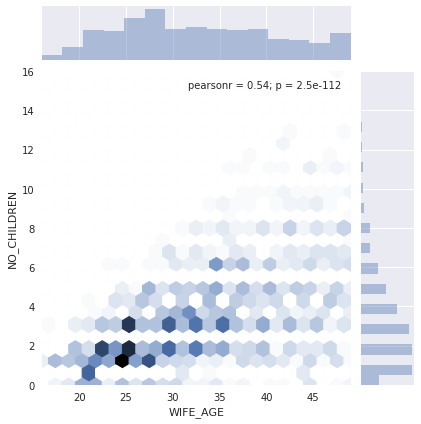

In [17]:
sns.jointplot('WIFE_AGE', 'NO_CHILDREN', data=cmc, kind='hex');

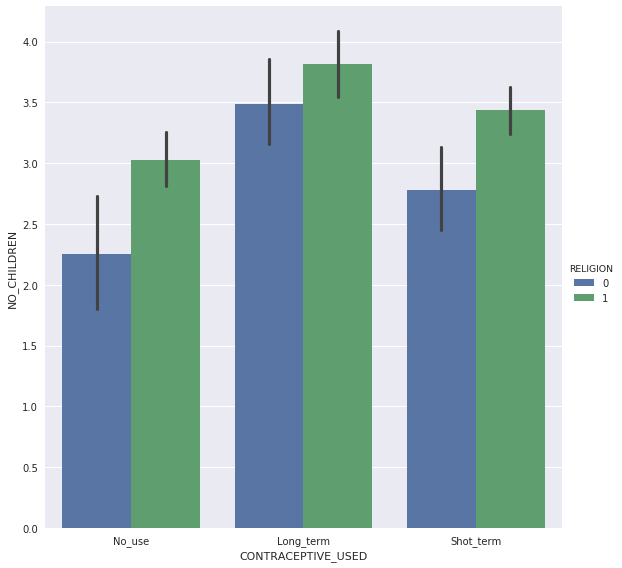

In [18]:
sns.factorplot(x='CONTRACEPTIVE_USED', y='NO_CHILDREN', hue='RELIGION', data=cmc, kind='bar', size=8);

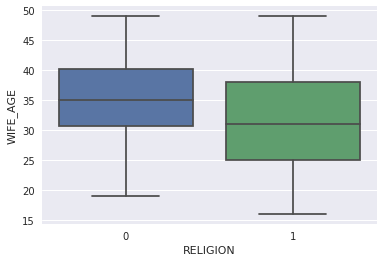

In [19]:
sns.boxplot(x='RELIGION', y='WIFE_AGE', data=cmc);

In [20]:
cmc.CONTRACEPTIVE_USED.unique()

array(['No_use', 'Long_term', 'Shot_term'], dtype=object)

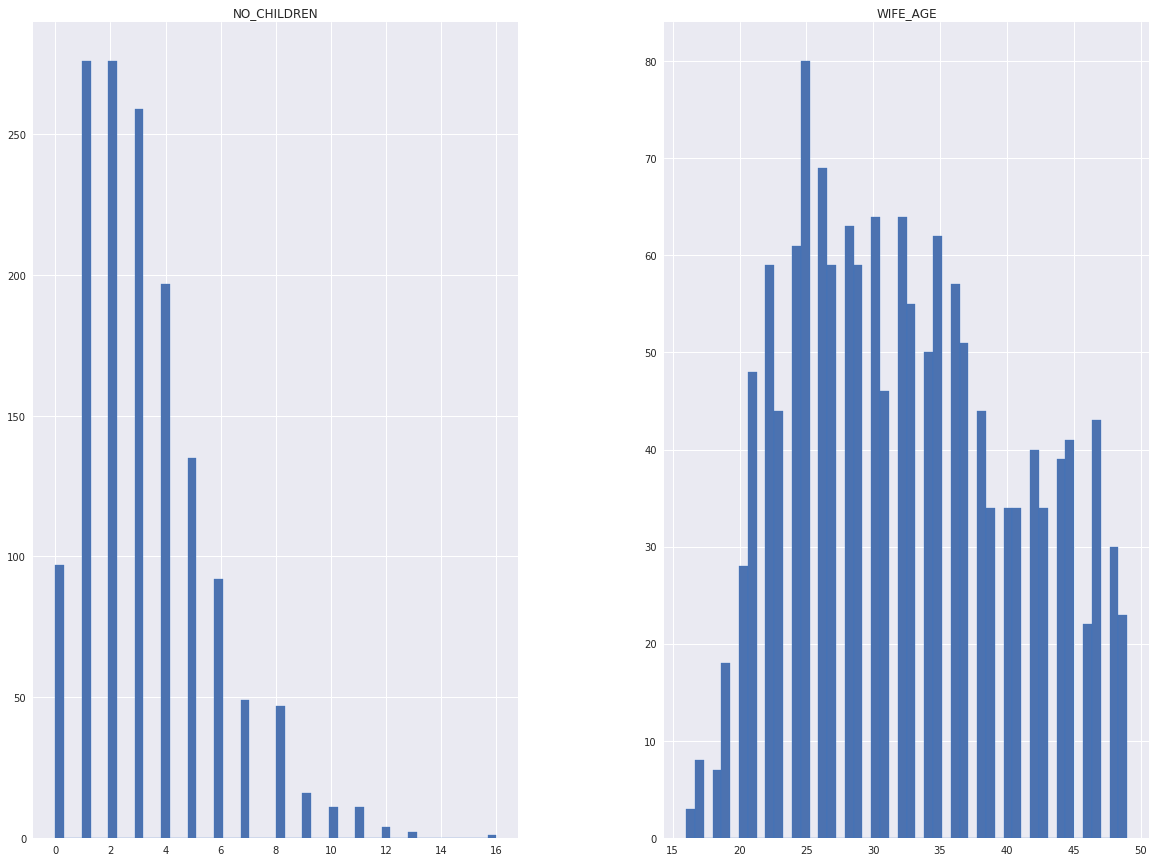

In [21]:
cmc.hist(bins=50, figsize=(20,15), edgecolor='b');

# split the data

In [22]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(cmc, cmc["CONTRACEPTIVE_USED"]):
    strat_train_set = cmc.loc[train_index]
    strat_test_set = cmc.loc[test_index]

In [23]:
strat_train_set_y = strat_train_set[['CONTRACEPTIVE_USED']]
strat_test_set_y = strat_test_set[['CONTRACEPTIVE_USED']]

In [24]:
strat_train_set_X = strat_train_set.drop(['CONTRACEPTIVE_USED'], axis=1)
strat_test_set_X = strat_test_set.drop(['CONTRACEPTIVE_USED'], axis=1)

In [25]:
# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
    def get_feature_names(self):
        return df.columns.tolist()

In [26]:
# the labelbinarizer is made for labels and will not natively work in the pipeline. This hacks that.
class SupervisionFriendlyLabelBinarizer(LabelBinarizer):
    def fit_transform(self, X, y=None):
        return super(SupervisionFriendlyLabelBinarizer, self).fit_transform(X)
    def get_feature_names(self):
        return df.columns.tolist()

In [27]:
colnames = list(cmc)

In [28]:
cmc.dtypes

WIFE_AGE              float64
WIFE_EDUCATION         object
HUSBAND_EDUCATION      object
NO_CHILDREN             int64
RELIGION               object
WORKING                object
HUSBAND_OCCUPATION     object
STANDARD_OF_LIVING     object
MEDIA_EXPOSURE         object
CONTRACEPTIVE_USED     object
dtype: object

In [29]:
num_attribs = ['WIFE_AGE', 'NO_CHILDREN']
cat_attribs = ['WIFE_EDUCATION', 'HUSBAND_EDUCATION', 'RELIGION', 'WORKING', 'HUSBAND_OCCUPATION', 'STANDARD_OF_LIVING', 'MEDIA_EXPOSURE']

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        #('LabelBinarizer', SupervisionFriendlyLabelBinarizer()),
        ('onehot', OneHotEncoder())
    ])

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [30]:
num_attribs = ['WIFE_AGE', 'NO_CHILDREN']
cat_attribs = ['WIFE_EDUCATION', 'HUSBAND_EDUCATION', 'RELIGION', 'WORKING', 'HUSBAND_OCCUPATION', 'STANDARD_OF_LIVING', 'MEDIA_EXPOSURE']

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline2 = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        #('LabelBinarizer', SupervisionFriendlyLabelBinarizer()),
        #('onehot', OneHotEncoder())
    ])

full_pipeline2 = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline2),
    ])

In [31]:
cmc_prepared = full_pipeline.fit_transform(strat_train_set_X)
cmc_prepared

<1178x24 sparse matrix of type '<class 'numpy.float64'>'
	with 10602 stored elements in Compressed Sparse Row format>

In [32]:
cmc_prepared2 = full_pipeline2.fit_transform(strat_train_set_X)
cmc_prepared2

array([[1.8854959991276858, -0.10824913401359731, '4', ..., '2', '4', '0'],
       [1.1565049307050348, 1.1543001716103407, '4', ..., '1', '3', '0'],
       [0.06301832807105824, -0.10824913401359731, '2', ..., '2', '4', '0'],
       ..., 
       [-0.42297571754404245, -0.10824913401359731, '2', ..., '3', '3', '0'],
       [1.7639974877239106, -0.52909890255491, '1', ..., '1', '3', '0'],
       [-0.3014772061402673, 0.3126006345277153, '2', ..., '2', '4', '0']], dtype=object)

In [33]:
full_pipeline2

FeatureUnion(n_jobs=1,
       transformer_list=[('num_pipeline', Pipeline(memory=None,
     steps=[('selector', DataFrameSelector(attribute_names=['WIFE_AGE', 'NO_CHILDREN'])), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True))])), ('cat_pipeline', Pipeline(memory=None,
     steps=[('selector', DataFrameSelector(attribute_names=['WIFE_EDUCATION', 'HUSBAND_EDUCATION', 'RELIGION', 'WORKING', 'HUSBAND_OCCUPATION', 'STANDARD_OF_LIVING', 'MEDIA_EXPOSURE']))]))],
       transformer_weights=None)

In [34]:
strat_train_set_y = strat_train_set_y.CONTRACEPTIVE_USED.map({'No_use': 0, 'Shot_term': 1, 'Long_term': 2})

In [35]:
strat_train_set_y.values

array([0, 2, 1, ..., 1, 0, 1])

In [36]:
sgbC = SGDClassifier(max_iter=1000)
sgbC.fit(cmc_prepared, strat_train_set_y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=1000, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [37]:
y_train_pred = cross_val_predict(sgbC, cmc_prepared, strat_train_set_y, cv=3)
y_train_pred

array([0, 1, 0, ..., 0, 0, 0])

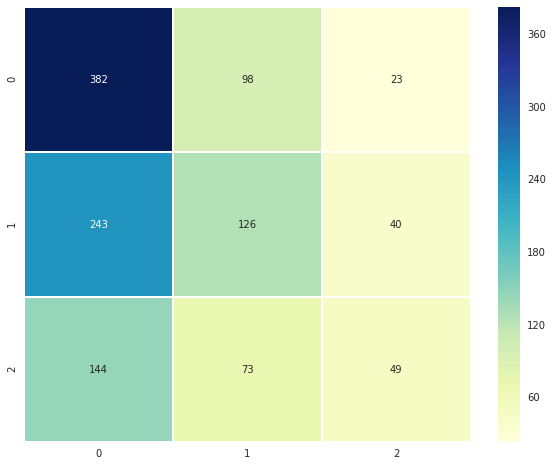

In [38]:
cmx = confusion_matrix(strat_train_set_y, y_train_pred)

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cmx, annot=True, fmt="d", linewidths=.5, ax=ax, cmap="YlGnBu");

In [39]:
mplC = MLPClassifier()
mplC.fit(cmc_prepared, strat_train_set_y)

/home/thomas/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [40]:
y_train_pred = cross_val_predict(mplC, cmc_prepared, strat_train_set_y, cv=3)
y_train_pred

/home/thomas/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/thomas/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/thomas/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


array([0, 2, 1, ..., 1, 0, 2])

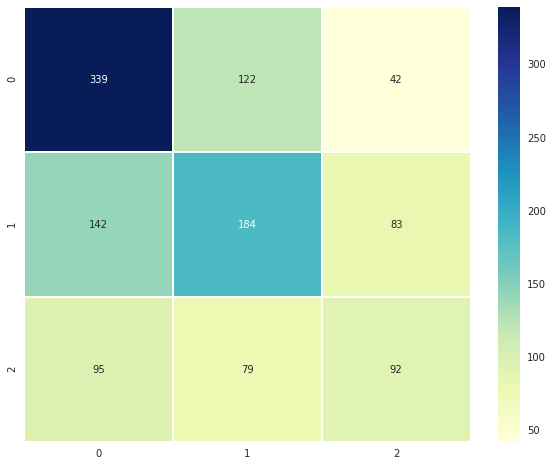

In [41]:
cmx = confusion_matrix(strat_train_set_y, y_train_pred)

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cmx, annot=True, fmt="d", linewidths=.5, ax=ax, cmap="YlGnBu");

In [42]:
knC = KNeighborsClassifier(n_neighbors=3)
knC.fit(cmc_prepared, strat_train_set_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [43]:
y_train_pred = cross_val_predict(knC, cmc_prepared, strat_train_set_y, cv=3)
y_train_pred

array([0, 2, 1, ..., 0, 0, 0])

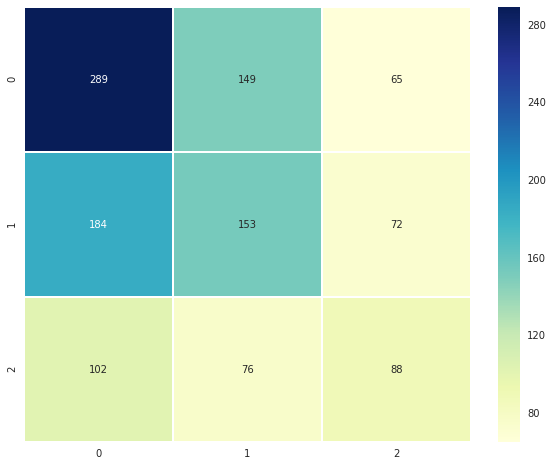

In [44]:
cmx = confusion_matrix(strat_train_set_y, y_train_pred)

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cmx, annot=True, fmt="d", linewidths=.5, ax=ax, cmap="YlGnBu");

In [45]:
svc = SVC()
svc.fit(cmc_prepared, strat_train_set_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [46]:
y_train_pred = cross_val_predict(svc, cmc_prepared, strat_train_set_y, cv=3)
y_train_pred

array([0, 2, 0, ..., 1, 0, 1])

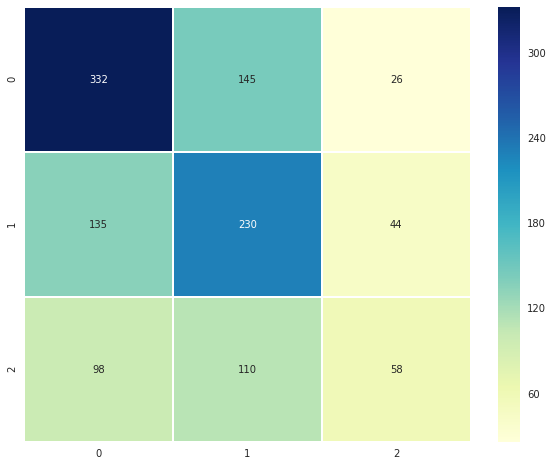

In [47]:
cmx = confusion_matrix(strat_train_set_y, y_train_pred)

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cmx, annot=True, fmt="d", linewidths=.5, ax=ax, cmap="YlGnBu");

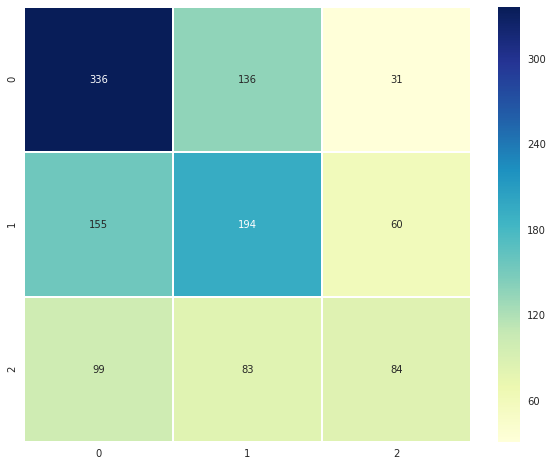

In [48]:
gpc = GaussianProcessClassifier()
svc.fit(cmc_prepared, strat_train_set_y)
y_train_pred = cross_val_predict(gpc, cmc_prepared.toarray(), strat_train_set_y, cv=3)

cmx = confusion_matrix(strat_train_set_y, y_train_pred)

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cmx, annot=True, fmt="d", linewidths=.5, ax=ax, cmap="YlGnBu");

In [55]:
cmc_prepared2.shape

(1178, 9)

In [56]:
colnames

['WIFE_AGE',
 'WIFE_EDUCATION',
 'HUSBAND_EDUCATION',
 'NO_CHILDREN',
 'RELIGION',
 'WORKING',
 'HUSBAND_OCCUPATION',
 'STANDARD_OF_LIVING',
 'MEDIA_EXPOSURE',
 'CONTRACEPTIVE_USED']

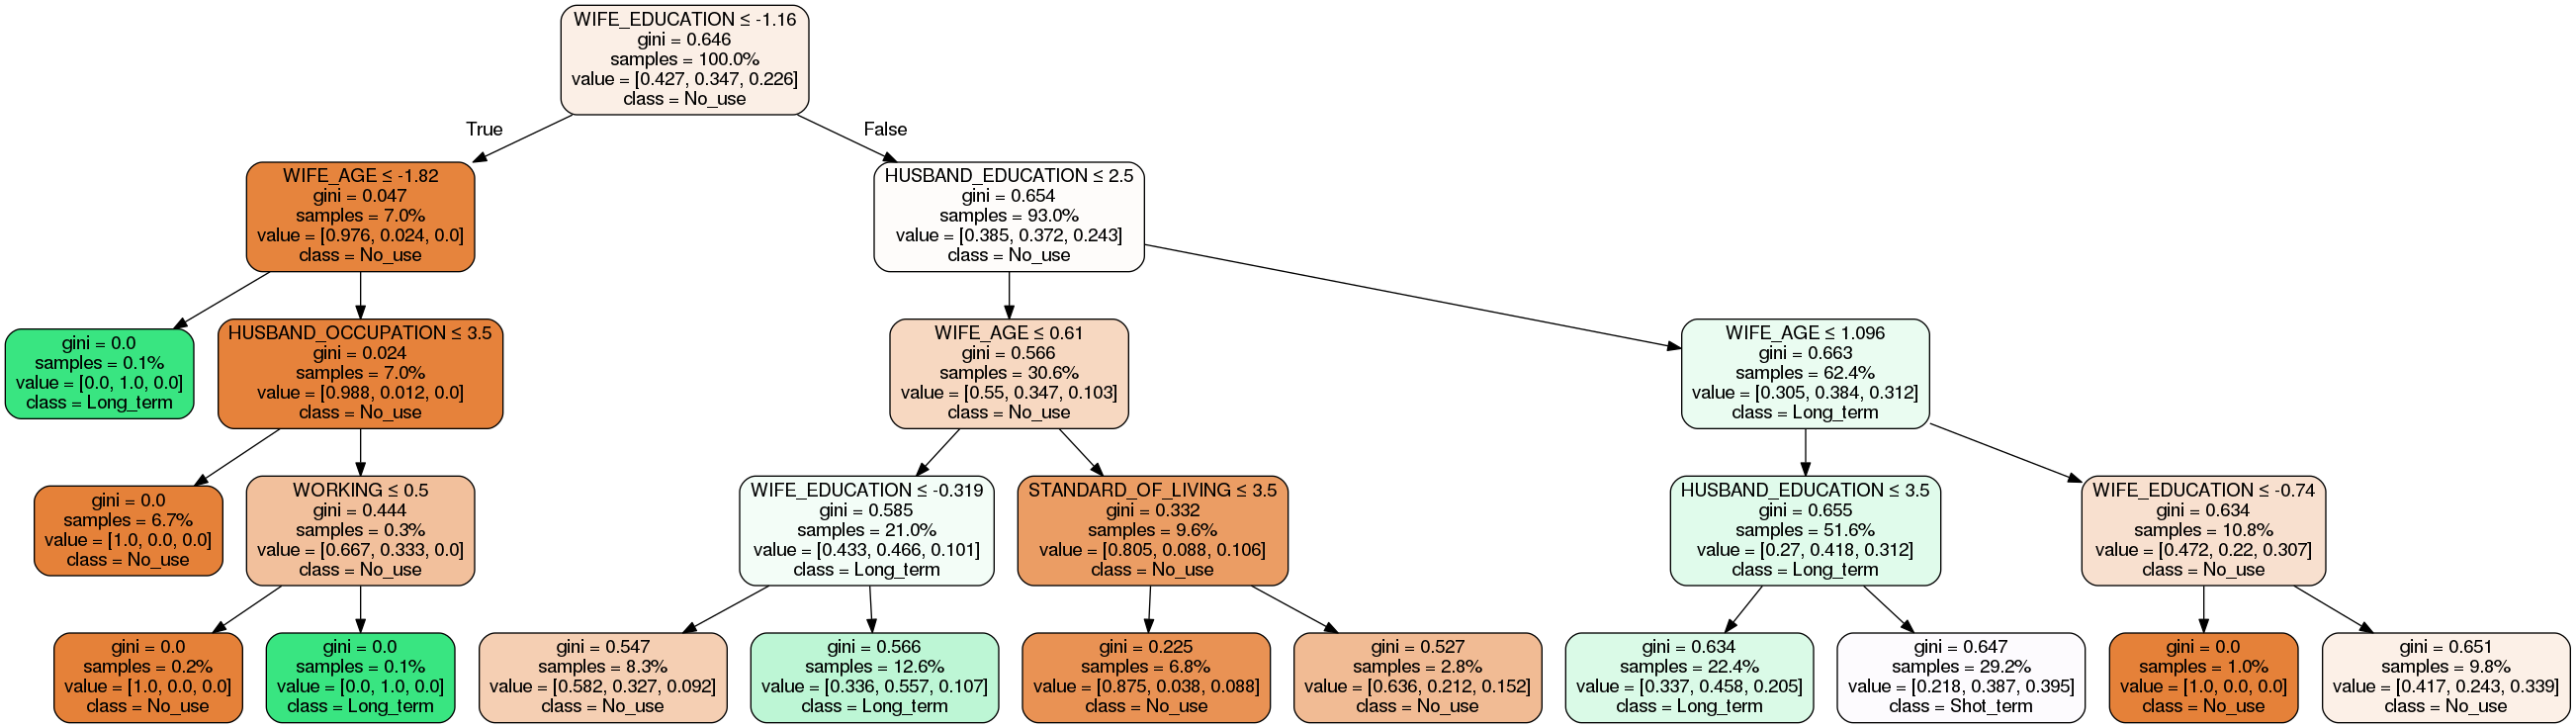

In [73]:
dtc = DecisionTreeClassifier(max_depth=4)
dt_model = dtc.fit(cmc_prepared2, strat_train_set_y)
dot_data = StringIO()
export_graphviz(dt_model, feature_names=colnames[:-1], class_names=['No_use','Long_term','Shot_term'], out_file=dot_data, proportion=True,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [65]:
graph.write_png('./asdf.png')

True

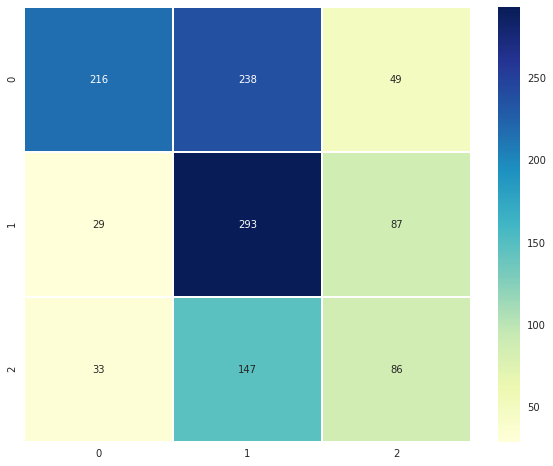

In [66]:
y_train_pred = cross_val_predict(dtc, cmc_prepared, strat_train_set_y, cv=3)

cmx = confusion_matrix(strat_train_set_y, y_train_pred)

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cmx, annot=True, fmt="d", linewidths=.5, ax=ax, cmap="YlGnBu");

In [ ]:
rfc = RandomForestClassifier()
svc.fit(cmc_prepared, strat_train_set_y)
y_train_pred = cross_val_predict(rfc, cmc_prepared, strat_train_set_y, cv=3)

cmx = confusion_matrix(strat_train_set_y, y_train_pred)

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cmx, annot=True, fmt="d", linewidths=.5, ax=ax, cmap="YlGnBu")

In [ ]:
abc = AdaBoostClassifier()
svc.fit(cmc_prepared, strat_train_set_y)
y_train_pred = cross_val_predict(abc, cmc_prepared, strat_train_set_y, cv=3)

cmx = confusion_matrix(strat_train_set_y, y_train_pred)

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cmx, annot=True, fmt="d", linewidths=.5, ax=ax, cmap="YlGnBu");